<a href="https://colab.research.google.com/github/JOSELUISMILLA/NET8APIDEMO/blob/main/Bitcoin2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS DE DATOS BITCOIN**

Bitcoin es la criptomoneda más antigua y conocida, lanzada por primera vez como código abierto en 2009 por el anónimo Satoshi Nakamoto. Bitcoin sirve como un medio descentralizado de intercambio digital, con transacciones verificadas y registradas en un libro de contabilidad público distribuido (la cadena de bloques) sin la necesidad de una autoridad de registro confiable o un intermediario central. Los bloques de transacciones contienen un hash criptográfico SHA-256 de bloques de transacciones anteriores y, por lo tanto, están "encadenados" entre sí, sirviendo como un registro inmutable de todas las transacciones que alguna vez han ocurrido. Al igual que con cualquier moneda/producto básico en el mercado, el comercio de bitcoins y los instrumentos financieros pronto siguieron a la adopción pública de bitcoin y continúan creciendo. Aquí se incluyen datos históricos del mercado de bitcoins en intervalos de 1 minuto para intercambios de bitcoins seleccionados donde se realizan transacciones.

Data : bitcoin.csv

Librerias a importar


In [1]:
#Importar Librerias
import random
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime   #Fecha
import multiprocessing
import numpy as np
import pandas as pd

In [3]:
# Lectura de datos https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
#Datos fuentes: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

df1 = pd.read_csv('coin_Bitcoin.csv')


In [4]:
#Lectura de datos  #bitcoin.csv
df2 = pd.read_csv('btcusd_1-min_data.csv')

In [ ]:
df1

Analisis de datos

In [6]:
#Analizar Datos
#Numero de registro , #Numero de Columnas y Tipos de Columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [7]:
df1.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [5]:
#Valores Faltantes
df1.isnull().sum

<bound method DataFrame.sum of         SNo   Name  Symbol   Date   High    Low   Open  Close  Volume  \
0     False  False   False  False  False  False  False  False   False   
1     False  False   False  False  False  False  False  False   False   
2     False  False   False  False  False  False  False  False   False   
3     False  False   False  False  False  False  False  False   False   
4     False  False   False  False  False  False  False  False   False   
...     ...    ...     ...    ...    ...    ...    ...    ...     ...   
2986  False  False   False  False  False  False  False  False   False   
2987  False  False   False  False  False  False  False  False   False   
2988  False  False   False  False  False  False  False  False   False   
2989  False  False   False  False  False  False  False  False   False   
2990  False  False   False  False  False  False  False  False   False   

      Marketcap  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
2986      False  
2987      False  
2988      False  
2989      False  
2990      False  

[2991 rows x 10 columns]>

In [ ]:
#Eliminar PrimerCOlumna
df1.dropna(axis=1)
df1

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [8]:
df1['Date']=pd.to_datetime(df1['Date'])

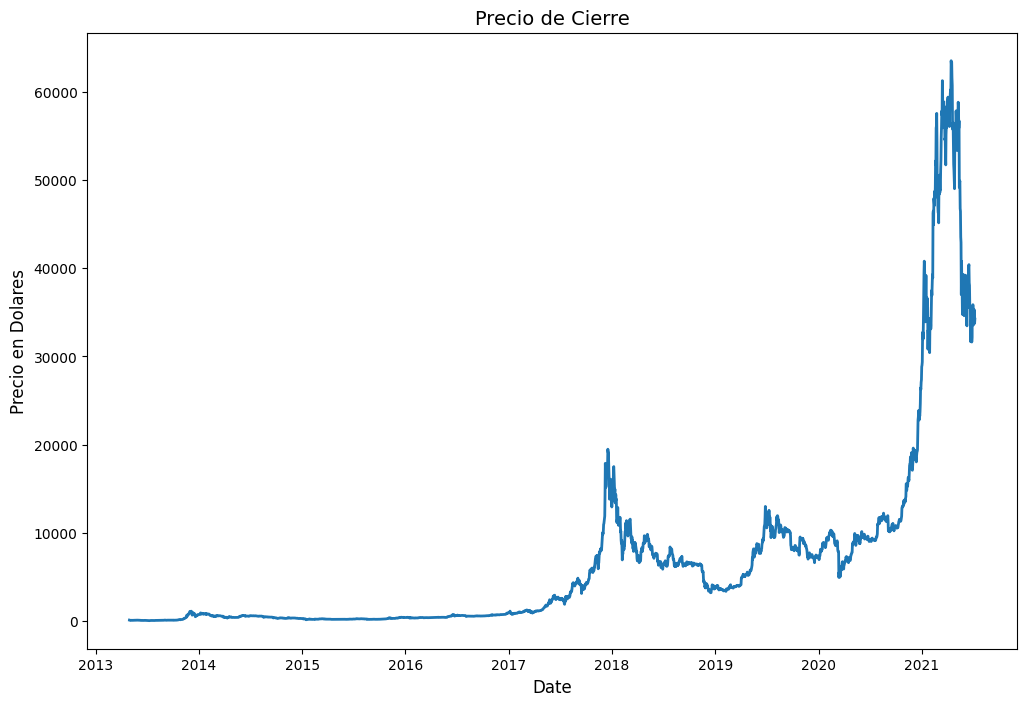

In [9]:
#Mostrar Precio de cierre
df1["Date"] =pd.to_datetime(df1.Date,format="%Y-%m-%d")
df1.index=df1['Date']
plt.figure(figsize =(12,8))
plt.plot(df1["Close"], linewidth=2)
plt.xlabel('Date',fontsize =12)
plt.ylabel('Precio en Dolares',fontsize =12)
plt.title('Precio de Cierre',fontsize =14)
plt.show() #mostrar

In [10]:
#Analizar Datos btcusd_1-min_data.csv' del
#Numero de registro , #Numero de Columnas y Tipos de Columnas
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492754 entries, 0 to 1492753
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1492754 non-null  float64
 1   Open       1492754 non-null  float64
 2   High       1492753 non-null  float64
 3   Low        1492753 non-null  float64
 4   Close      1492753 non-null  float64
 5   Volume     1492753 non-null  float64
dtypes: float64(6)
memory usage: 68.3 MB


In [11]:
df2['Date']=pd.to_datetime(df2['Timestamp'])

In [12]:
df2

,Timestamp,Open,High,Low,Close,Volume,Date
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412060
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412120
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412180
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412240
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412300
...,...,...,...,...,...,...,...
1492749,1.414988e+09,325.25,326.45,324.78,326.40,30.751528,1970-01-01 00:00:01.414987800
1492750,1.414988e+09,325.42,326.39,324.48,324.48,50.792600,1970-01-01 00:00:01.414987860
1492751,1.414988e+09,325.72,325.72,324.22,324.22,50.043000,1970-01-01 00:00:01.414987920
1492752,1.414988e+09,325.66,325.67,325.66,325.67,0.681970,1970-01-01 00:00:01.414987980


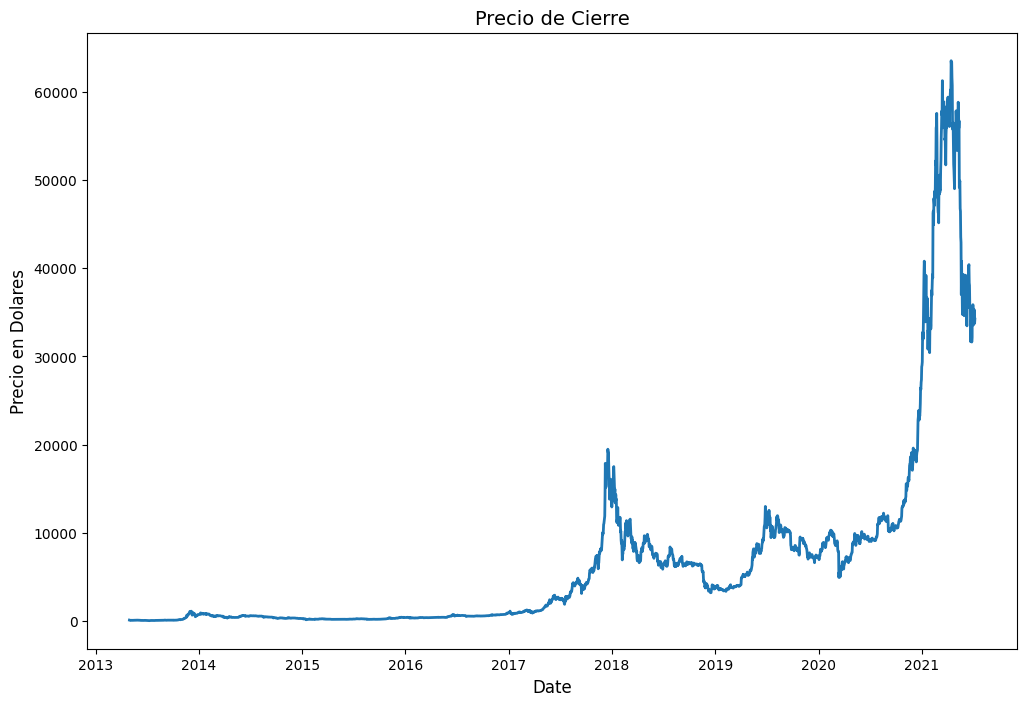

In [92]:
#Mostrar Precio de cierre
df2["Date"] =pd.to_datetime(df2.Date,format="%Y-%m-%d")
df2.index=df2['Date']
plt.figure(figsize =(12,8))
plt.plot(df1["Close"], linewidth=2)
plt.xlabel('Date',fontsize =12)
plt.ylabel('Precio en Dolares',fontsize =12)
plt.title('Precio de Cierre',fontsize =14)
plt.show() #mostrar

In [62]:
#Cálculos de promedios
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt

In [82]:
df2['Año'] = (pd.to_datetime(df2['Date'], format='%Y.%m.%d', errors="coerce")
               .dt.year
               )


In [87]:
df2['Mes'] = (pd.to_datetime(df2['Date'], format='%Y.%m.%d', errors="coerce")
               .dt.month
               )

In [89]:
df2["Trimestre"] = df2["Date"].dt.quarter

In [93]:
pivot_group = df2.groupby(['Open', 'Trimestre','Año'])['High'].sum().unstack(fill_value=0)
pivot_group

,Año,1970
Open,Trimestre,
3.80,1,26.60
4.14,1,389.16
4.15,1,78.85
4.17,1,587.97
4.21,1,1035.66
...,...,...
1162.67,1,2325.54
1162.87,1,2325.74
1162.97,1,1162.97


In [90]:
df2

,Timestamp,Open,High,Low,Close,Volume,Date,Año,Mes,Trimestre
Date,,,,,,,,,,
1970-01-01 00:00:01.325412060,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412060,1970,1,1
1970-01-01 00:00:01.325412120,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412120,1970,1,1
1970-01-01 00:00:01.325412180,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412180,1970,1,1
1970-01-01 00:00:01.325412240,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412240,1970,1,1
1970-01-01 00:00:01.325412300,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412300,1970,1,1
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:01.414987800,1.414988e+09,325.25,326.45,324.78,326.40,30.751528,1970-01-01 00:00:01.414987800,1970,1,1
1970-01-01 00:00:01.414987860,1.414988e+09,325.42,326.39,324.48,324.48,50.792600,1970-01-01 00:00:01.414987860,1970,1,1
1970-01-01 00:00:01.414987920,1.414988e+09,325.72,325.72,324.22,324.22,50.043000,1970-01-01 00:00:01.414987920,1970,1,1


In [64]:
# Función de mapeo: calcular el promedio de una observación
def map_function(df2):
    total = sum(df2.High)
    return total / len(df2.High)

In [65]:
df2

,Timestamp,Open,High,Low,Close,Volume,Date
Date,,,,,,,
1970-01-01 00:00:01.325412060,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412060
1970-01-01 00:00:01.325412120,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412120
1970-01-01 00:00:01.325412180,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412180
1970-01-01 00:00:01.325412240,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412240
1970-01-01 00:00:01.325412300,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,1970-01-01 00:00:01.325412300
...,...,...,...,...,...,...,...
1970-01-01 00:00:01.414987800,1.414988e+09,325.25,326.45,324.78,326.40,30.751528,1970-01-01 00:00:01.414987800
1970-01-01 00:00:01.414987860,1.414988e+09,325.42,326.39,324.48,324.48,50.792600,1970-01-01 00:00:01.414987860
1970-01-01 00:00:01.414987920,1.414988e+09,325.72,325.72,324.22,324.22,50.043000,1970-01-01 00:00:01.414987920


In [66]:
pip install pyspark

In [67]:
# Importar librerías necesarias
import matplotlib.pyplot as plt  # Importar la librería para visualización
from pyspark.sql import SparkSession  # Importar la clase SparkSession para crear una sesión de Spark
from pyspark.sql.functions import col, avg, sum, count, when, concat, substring, date_add, lit, to_date, year # Importar funciones para operaciones en DataFrame
from pyspark.sql.types import StructType, StructField, StringType, FloatType, DateType  # Importar tipos de datos para definir el esquema
from pyspark.sql.window import Window  # Importar módulo para operaciones de ventana en DataFrame
from pyspark.sql.functions import row_number, rank  # Importar funciones para cálculos de ranking en DataFrame
from pyspark.sql.functions import expr  # Importar función expr para cálculos de expresiones
from pyspark.sql.functions import udf  # Importar función udf para definir funciones definidas por el usuario
from pyspark.sql.types import IntegerType  # Importar tipo de dato IntegerType

# Crear una sesión de Spark
spark = SparkSession.builder.appName("bitcoin2").getOrCreate()


In [111]:
df3 = pd.DataFrame(df1)

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2991 non-null   datetime64[ns]
 1   High    2991 non-null   float64       
 2   Low     2991 non-null   float64       
 3   Open    2991 non-null   float64       
 4   Close   2991 non-null   float64       
 5   Volume  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 163.6 KB


In [113]:
df3=df3.drop(columns = ['SNo'])


In [114]:
df3=df3.drop(columns = ['Symbol'])

In [115]:
df3=df3.drop(columns = ['Name'])

In [116]:
df3=df3.drop(columns = ['Marketcap'])

In [106]:
df3=df3.drop(columns = ['Date'])

In [107]:
df3.head()


,High,Low,Open,Close,Volume
Date,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0


In [119]:
# Definimos el esquema del DataFrame que vamos a crear.
schema = StructType([

    StructField("Date", DateType(), True),
    StructField("Open", FloatType(), True),
      StructField("High", FloatType(), True),
     StructField("Low", FloatType(), True),
    StructField("Close", FloatType(), True),
    StructField("Volume", FloatType(), True)

])

In [120]:
# Creamos un DataFrame utilizando Spark, pasando los datos y el esquema definido.
df4 = spark.createDataFrame(df3, schema)

In [121]:
df4 = df4.withColumn("Name", lit("Bitcoin"))

In [75]:
df4

DataFrame[Open: float, High: float, Low: float, Close: float, Volume: float, Date: date, Name: string]

In [122]:
# Realizamos una transformación en el DataFrame, agregando una nueva columna "delta" que contiene calcula la variacion del precio con respecto al anterior
transformed_df = df4.withColumn("Delta", col("Close") - col("Open"))

In [123]:
transformed_df.show()

+----------+-------+-------+-------+-------+------+-------+-----------+
|      Date|   Open|   High|    Low|  Close|Volume|   Name|      Delta|
+----------+-------+-------+-------+-------+------+-------+-----------+
|2013-04-29|147.488|  134.0|134.444| 144.54|   0.0|Bitcoin| -2.9480133|
|2013-04-30| 146.93| 134.05|  144.0|  139.0|   0.0|Bitcoin| -7.9299927|
|2013-05-01| 139.89| 107.72|  139.0| 116.99|   0.0|Bitcoin| -22.900002|
|2013-05-02|  125.6|92.2819| 116.38| 105.21|   0.0|Bitcoin|     -20.39|
|2013-05-03|108.128|   79.1| 106.25|  97.75|   0.0|Bitcoin| -10.377998|
|2013-05-04|  115.0|   92.5|   98.1|  112.5|   0.0|Bitcoin|       -2.5|
|2013-05-05|  118.8|107.143|  112.9| 115.91|   0.0|Bitcoin| -2.8899994|
|2013-05-06|124.663| 106.64| 115.98|  112.3|   0.0|Bitcoin| -12.362999|
|2013-05-07|113.444|   97.7| 112.25|  111.5|   0.0|Bitcoin| -1.9440002|
|2013-05-08| 115.78|  109.6|  109.6|113.566|   0.0|Bitcoin|  -2.213997|
|2013-05-09| 113.46| 109.26|  113.2| 112.67|   0.0|Bitcoin| -0.7

In [128]:
# Realizamos un filtrado en el DataFrame para seleccionar las filas donde la fecha sea de 1 mes
filtered_df = df4.filter((col("Date") >= '2013-04-29') & (col("Date") <= '2013-05-18'))

In [129]:
# Visualización 1: Resultado del DataFrame transformado
#transformed_df.show()
filtered_df.show()

+----------+-------+-------+-------+-------+------+-------+
|      Date|   Open|   High|    Low|  Close|Volume|   Name|
+----------+-------+-------+-------+-------+------+-------+
|2013-04-29|147.488|  134.0|134.444| 144.54|   0.0|Bitcoin|
|2013-04-30| 146.93| 134.05|  144.0|  139.0|   0.0|Bitcoin|
|2013-05-01| 139.89| 107.72|  139.0| 116.99|   0.0|Bitcoin|
|2013-05-02|  125.6|92.2819| 116.38| 105.21|   0.0|Bitcoin|
|2013-05-03|108.128|   79.1| 106.25|  97.75|   0.0|Bitcoin|
|2013-05-04|  115.0|   92.5|   98.1|  112.5|   0.0|Bitcoin|
|2013-05-05|  118.8|107.143|  112.9| 115.91|   0.0|Bitcoin|
|2013-05-06|124.663| 106.64| 115.98|  112.3|   0.0|Bitcoin|
|2013-05-07|113.444|   97.7| 112.25|  111.5|   0.0|Bitcoin|
|2013-05-08| 115.78|  109.6|  109.6|113.566|   0.0|Bitcoin|
|2013-05-09| 113.46| 109.26|  113.2| 112.67|   0.0|Bitcoin|
|2013-05-10|  122.0|111.551|112.799|  117.2|   0.0|Bitcoin|
|2013-05-11|118.679| 113.01|  117.7|115.243|   0.0|Bitcoin|
|2013-05-12|117.449|113.435| 115.64|  11

In [130]:
#Convertir fecha en año
groupedfechayear_df = df4.withColumn("Date", to_date(col("Date"), "d/MM/yyyy"))\
    .withColumn('year', year("Date"))

groupedfechayear_df.show()
#Filtrar por año y suma los precios precios
groupedfechayear_df.groupBy("year").sum("High").show()

+----------+-------+-------+-------+-------+------+-------+----+
|      Date|   Open|   High|    Low|  Close|Volume|   Name|year|
+----------+-------+-------+-------+-------+------+-------+----+
|2013-04-29|147.488|  134.0|134.444| 144.54|   0.0|Bitcoin|2013|
|2013-04-30| 146.93| 134.05|  144.0|  139.0|   0.0|Bitcoin|2013|
|2013-05-01| 139.89| 107.72|  139.0| 116.99|   0.0|Bitcoin|2013|
|2013-05-02|  125.6|92.2819| 116.38| 105.21|   0.0|Bitcoin|2013|
|2013-05-03|108.128|   79.1| 106.25|  97.75|   0.0|Bitcoin|2013|
|2013-05-04|  115.0|   92.5|   98.1|  112.5|   0.0|Bitcoin|2013|
|2013-05-05|  118.8|107.143|  112.9| 115.91|   0.0|Bitcoin|2013|
|2013-05-06|124.663| 106.64| 115.98|  112.3|   0.0|Bitcoin|2013|
|2013-05-07|113.444|   97.7| 112.25|  111.5|   0.0|Bitcoin|2013|
|2013-05-08| 115.78|  109.6|  109.6|113.566|   0.0|Bitcoin|2013|
|2013-05-09| 113.46| 109.26|  113.2| 112.67|   0.0|Bitcoin|2013|
|2013-05-10|  122.0|111.551|112.799|  117.2|   0.0|Bitcoin|2013|
|2013-05-11|118.679| 113.

In [131]:
# Realizamos una operación de agrupación en el DataFrame `df` usando el atributo "name".
# Luego aplicamos diferentes funciones de agregación: promedio de precio mas alto, suma de del campo volumen y conteo total de filas.
grouped_df = groupedfechayear_df.groupBy("year").agg(avg("High"), sum("Volume"), count("*"))
# Visualización 2: Resultado del DataFrame agrupado
grouped_df.show()

+----+------------------+------------------+--------+
|year|         avg(High)|       sum(Volume)|count(1)|
+----+------------------+------------------+--------+
|2015|266.80789075877567|   1.2375531708E10|     365|
|2013| 240.0875262673567|        1.399848E8|     247|
|2014| 514.3669441118632|     9.159181104E9|     365|
|2016| 560.4533736432185|   3.1448370984E10|     366|
|2018| 7350.747938516695| 2.213196540672E12|     365|
|2019| 7222.602868819564|  6.10662829312E12|     365|
|2020|10844.595162813781|1.2086518378496E13|     366|
|2017| 3811.707791764769|  8.69746420804E11|     365|
|2021|43692.138849431816|1.1291632293888E13|     187|
+----+------------------+------------------+--------+



In [ ]:
df4.head()

Row(Open=57854.0, High=57864.0, Low=57835.0, Close=57835.0, Volume=1.3534661531448364, Date=datetime.date(2024, 9, 13), Name='Bitcoin')

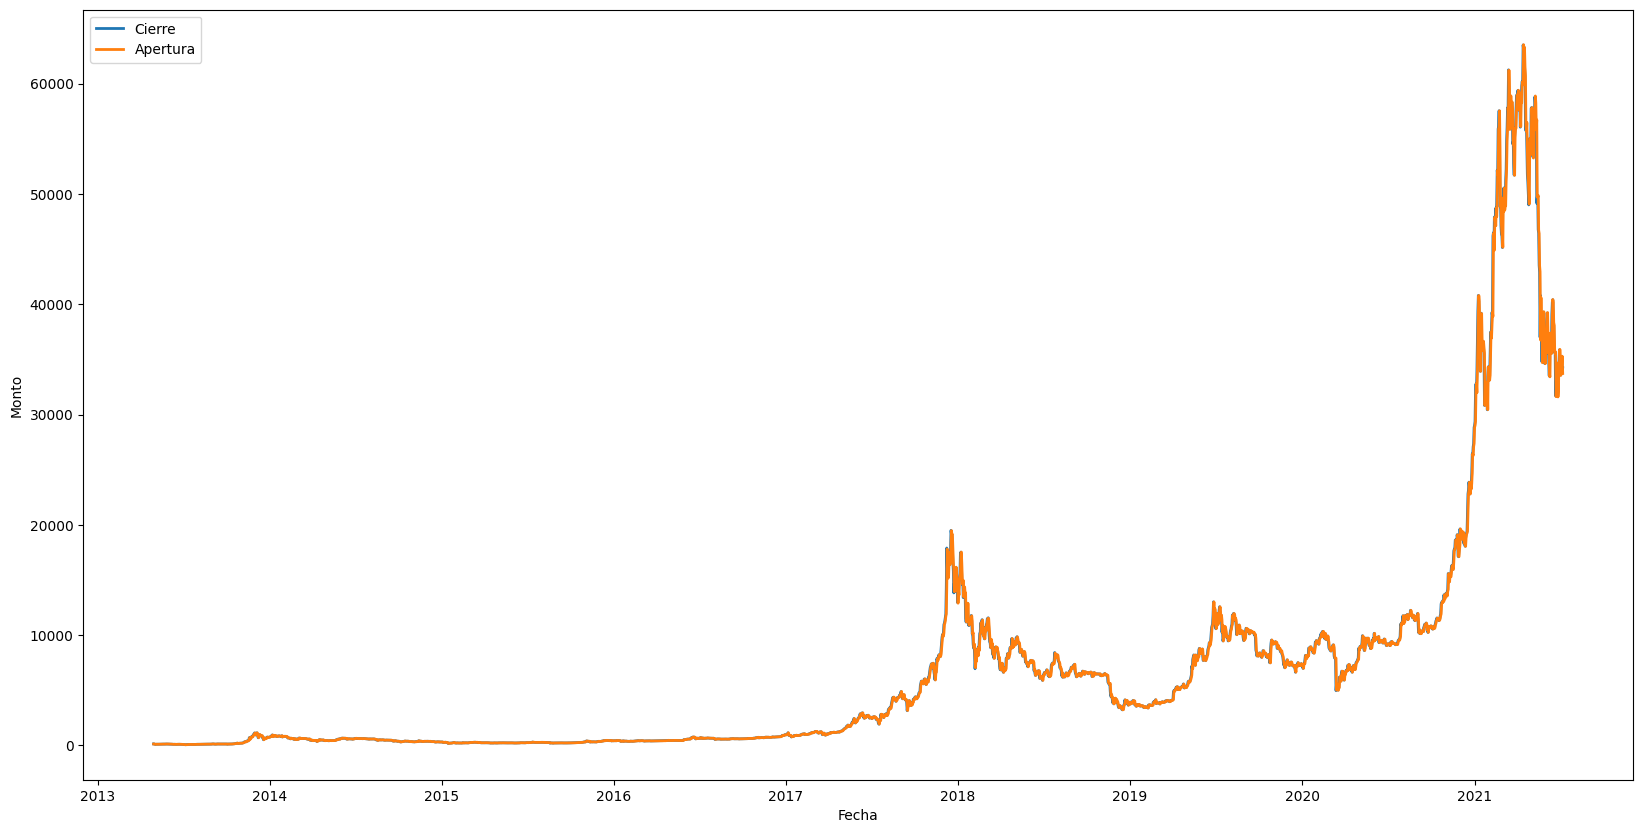

In [132]:
#Comporando precio de apertura y cierre por años / Utilizando DF3 dataframe
import matplotlib.pyplot as plt
import numpy as np

plt.figure (figsize=(20, 10))
plt.plot(df3['Date'],df3['Close'], label ='Cierre', linewidth=2)
plt.plot(df3['Date'], df3['Open'], label ='Apertura',linewidth=2)
plt.legend(loc='best')
plt.xlabel("Fecha")
plt.ylabel("Monto")
plt.show()

In [133]:
# Calcular estadísticas descriptivas
from pyspark.sql.functions import col, avg, median  # Importar funciones para operaciones en DataFrame
stats = groupedfechayear_df.describe().toPandas()  # Calcular estadísticas y convertirlas a DataFrame de Pandas
average_High = float(stats.loc[1, "High"])  # Extraer el valor promedio del precio "High"
median_Low = float(filtered_df.select(median("Low")).first()[0])  # Extraer la mediana del precio del bitcoin "Low"

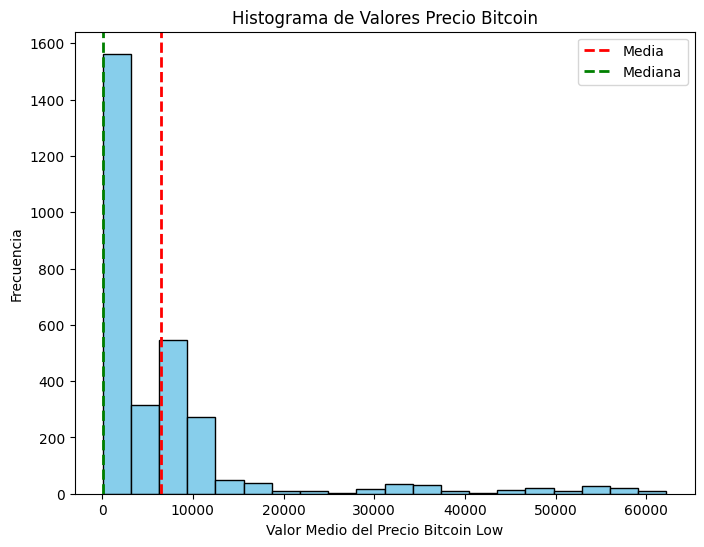

In [134]:
# Visualización: Histograma de valores medios del Precio alto (High) del bitocin
medval_values = groupedfechayear_df.select("High").rdd.flatMap(lambda x: x).collect()  # Extraer valores de "High" y convertir a lista
plt.figure(figsize=(8, 6))  # Crear una figura para la visualización
plt.hist(medval_values, bins=20, color='skyblue', edgecolor='black')  # Crear un histograma de los valores con opciones de estilo
plt.title("Histograma de Valores Precio Bitcoin")  # Establecer título del gráfico
plt.xlabel("Valor Medio del Precio Bitcoin Low")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y
plt.axvline(average_High, color='red', linestyle='dashed', linewidth=2, label='Media')  # Agregar línea punteada roja para la media
plt.axvline(median_Low, color='green', linestyle='dashed', linewidth=2, label='Mediana')  # Agregar línea punteada verde para la mediana
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la visualización

**PCA con PySpark**
Este código realiza un análisis de componentes principales (**PCA**) en un conjunto de datos utilizando PySpark. Se carga el conjunto de datos, se preparan los datos para PCA, se selecciona el número óptimo de componentes y se calcula el impacto en el uso de memoria antes y después de aplicar PCA. Este es un proceso común en el análisis de datos para reducir la dimensionalidad de los datos y mantener solo las características más importantes.
Se importa la clase SparkSession de la biblioteca pyspark. SparkSession se utiliza para crear una sesión de Spark, que es el punto de entrada para interactuar con Spark y realizar operaciones de procesamiento distribuido de datos.

In [135]:
pip install ucimlrepo

In [138]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_bitcoin_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_bitcoin_health_indicators.data.High
y = cdc_bitcoin_health_indicators.data.Low

# metadata
print(cdc_bitcoin_health_indicators.metadata)

# variable information
print(cdc_bitcoin_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


In [140]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from ucimlrepo import fetch_ucirepo

In [144]:
groupedfechayear_df.show()

+----------+-------+-------+-------+-------+------+-------+----+
|      Date|   Open|   High|    Low|  Close|Volume|   Name|year|
+----------+-------+-------+-------+-------+------+-------+----+
|2013-04-29|147.488|  134.0|134.444| 144.54|   0.0|Bitcoin|2013|
|2013-04-30| 146.93| 134.05|  144.0|  139.0|   0.0|Bitcoin|2013|
|2013-05-01| 139.89| 107.72|  139.0| 116.99|   0.0|Bitcoin|2013|
|2013-05-02|  125.6|92.2819| 116.38| 105.21|   0.0|Bitcoin|2013|
|2013-05-03|108.128|   79.1| 106.25|  97.75|   0.0|Bitcoin|2013|
|2013-05-04|  115.0|   92.5|   98.1|  112.5|   0.0|Bitcoin|2013|
|2013-05-05|  118.8|107.143|  112.9| 115.91|   0.0|Bitcoin|2013|
|2013-05-06|124.663| 106.64| 115.98|  112.3|   0.0|Bitcoin|2013|
|2013-05-07|113.444|   97.7| 112.25|  111.5|   0.0|Bitcoin|2013|
|2013-05-08| 115.78|  109.6|  109.6|113.566|   0.0|Bitcoin|2013|
|2013-05-09| 113.46| 109.26|  113.2| 112.67|   0.0|Bitcoin|2013|
|2013-05-10|  122.0|111.551|112.799|  117.2|   0.0|Bitcoin|2013|
|2013-05-11|118.679| 113.

In [156]:
# Inicializa la sesión de Spark
spark = SparkSession.builder.appName("Dataset Analysis").getOrCreate()

In [167]:
# Obtiene los DataFrames de Pandas
X_pandas = groupedfechayear_df.select('High').toPandas()['High'].tolist()
y_pandas = groupedfechayear_df.select('Low').toPandas()['Low'].tolist()

In [170]:
# Convierte los DataFrames de Pandas a DataFrames de PySpark
X_spark = spark.createDataFrame(X_pandas, FloatType())
y_spark = spark.createDataFrame(y_pandas, FloatType())

In [171]:
# Añadir una columna de índice a ambos DataFrames
X_spark = X_spark.withColumn("index", monotonically_increasing_id())
y_spark = y_spark.withColumn("index", monotonically_increasing_id())

In [173]:
X_spark.show()

+-------+-----+
|  value|index|
+-------+-----+
|  134.0|    0|
| 134.05|    1|
| 107.72|    2|
|92.2819|    3|
|   79.1|    4|
|   92.5|    5|
|107.143|    6|
| 106.64|    7|
|   97.7|    8|
|  109.6|    9|
| 109.26|   10|
|111.551|   11|
| 113.01|   12|
|113.435|   13|
|  114.5|   14|
| 110.25|   15|
|  103.5|   16|
|  112.2|   17|
|116.571|   18|
|  122.3|   19|
+-------+-----+
only showing top 20 rows



In [174]:
# Paso 1: Preparar los datos para PCA
assembler = VectorAssembler(inputCols=X_spark.columns[:-1], outputCol="High")
scaler = StandardScaler(inputCol="High", outputCol="scaledHigh", withStd=True, withMean=False)



In [180]:
# Paso 2: Aplicar PCA
pca = PCA(inputCol="scaledHigh", outputCol="pcaHigh", k=1110)  # Ajusta el valor de k según sea necesario
pipeline = Pipeline(stages=[assembler, scaler, pca])


array([[<Axes: xlabel='SNo', ylabel='SNo'>,
        <Axes: xlabel='High', ylabel='SNo'>,
        <Axes: xlabel='Low', ylabel='SNo'>,
        <Axes: xlabel='Open', ylabel='SNo'>,
        <Axes: xlabel='Close', ylabel='SNo'>,
        <Axes: xlabel='Volume', ylabel='SNo'>,
        <Axes: xlabel='Marketcap', ylabel='SNo'>],
       [<Axes: xlabel='SNo', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>,
        <Axes: xlabel='Marketcap', ylabel='High'>],
       [<Axes: xlabel='SNo', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>,
        <Axes: xlabel='Marketcap', ylabel='Low'>],
       [<Axes: xlabel='SNo'

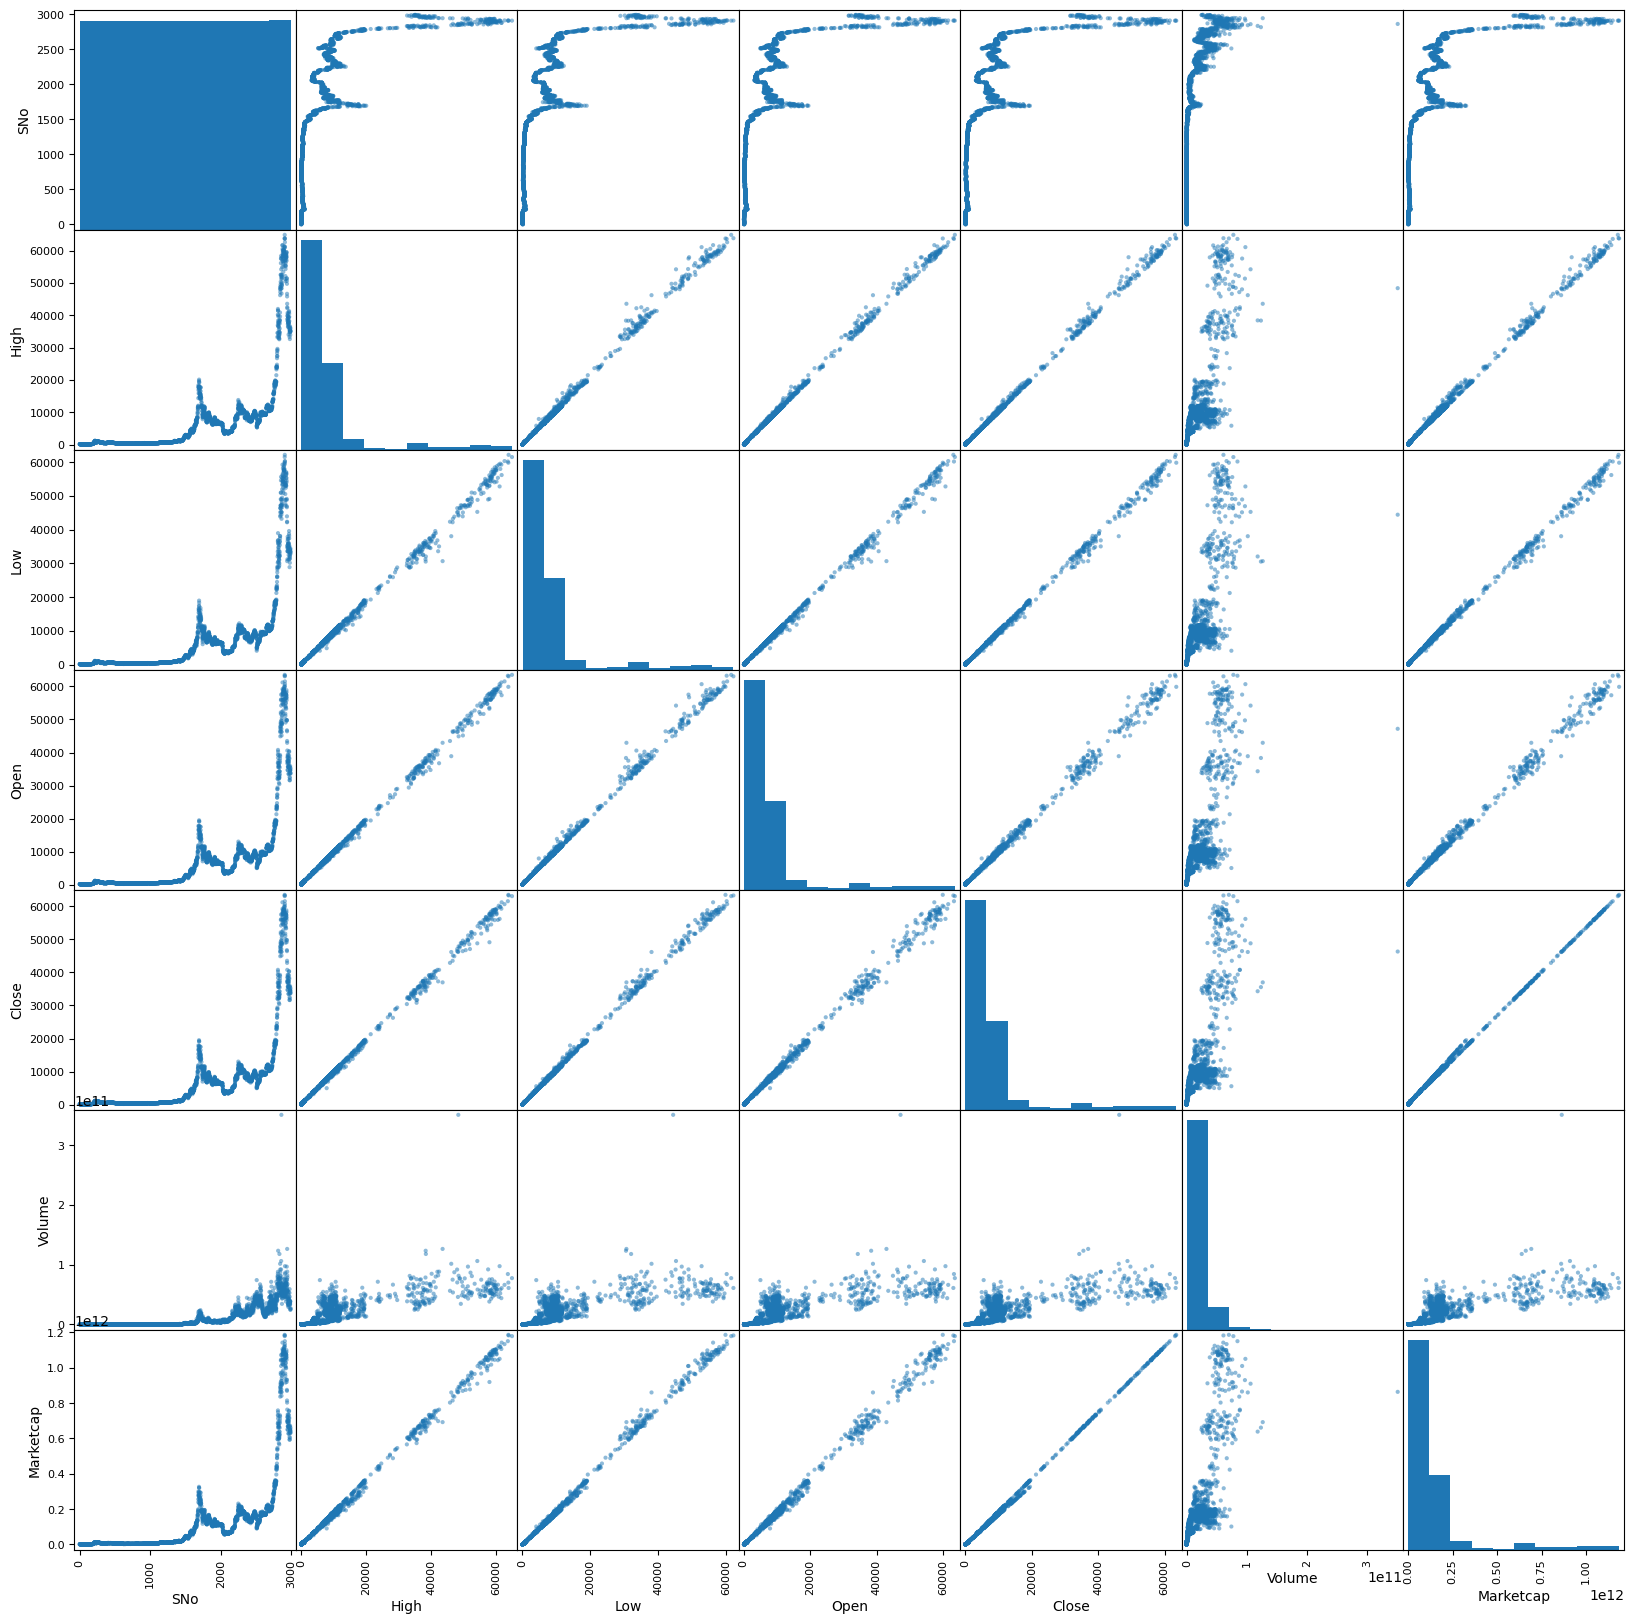

In [189]:
#Diagrama de dispersion
import pandas as pd
df6=pd.read_csv('coin_Bitcoin.csv')
pd.plotting.scatter_matrix(df6,figsize=(20,20))

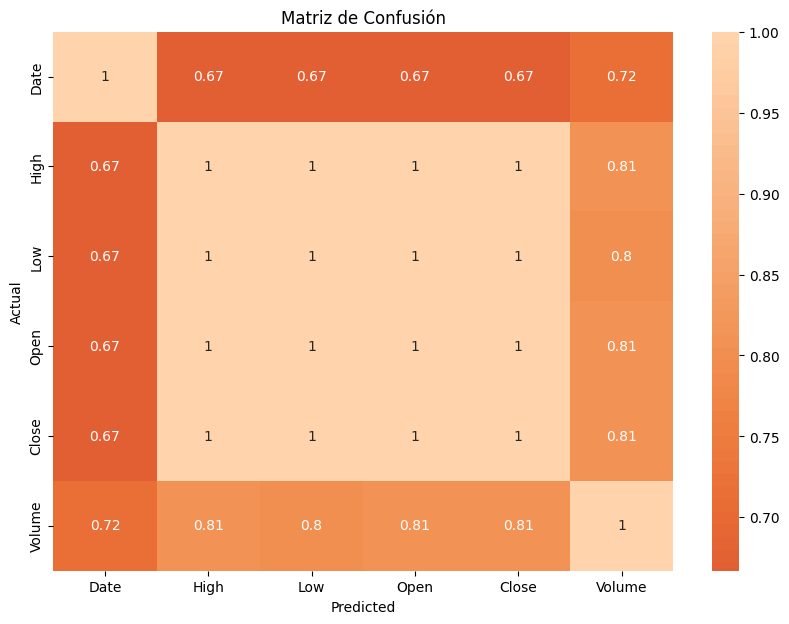

In [208]:
# Graficar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(df3.corr(), annot=True, center=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

plt.show()